## 1. Imorting all necessary package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

## 2. Reading the file

In [2]:
data =  pd.read_csv("D:\ML\TSP\Iris.csv")

## 3. Analysing the data

### 3.1 showing sample data

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### 3.2 checking the shape of dataset

In [4]:
data.shape

(150, 6)

### 3.3 checking of null value

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 3.4 checking of unique values of each columns

In [6]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

### 3.5 showing how many types are there in output column

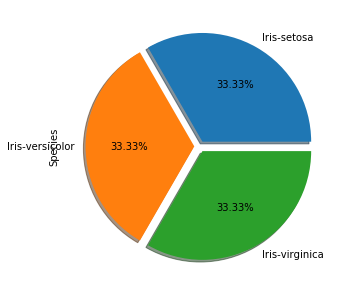

In [7]:
data['Species'].value_counts().plot.pie(explode=[0.05,0.05,0.05],shadow=True,figsize=(8,5), autopct='%1.2f%%')

### 3.6 showing the frequency of SepalLengthCm

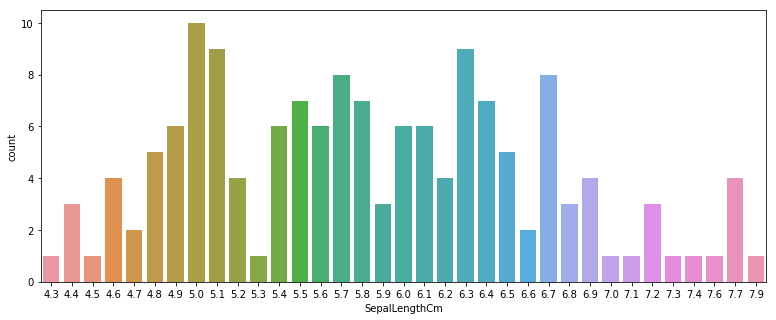

In [8]:
sns.countplot(x="SepalLengthCm", data=data)
fig = plt.gcf()
fig.set_size_inches(13,5)

### 3.7 showing the frequency of SepalWidthCm

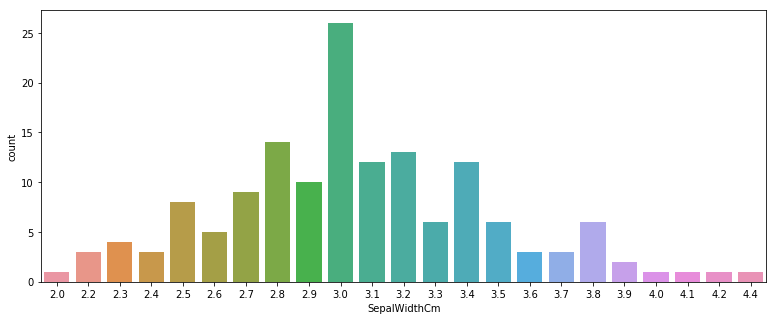

In [9]:
sns.countplot(x="SepalWidthCm", data=data)
fig = plt.gcf()
fig.set_size_inches(13,5)

### 3.8 showing the frequency of PetalLengthCm

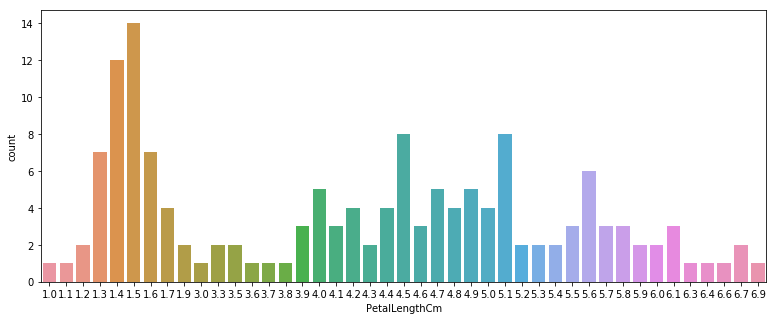

In [10]:
sns.countplot(x="PetalLengthCm", data=data)
fig = plt.gcf()
fig.set_size_inches(13,5)

### 3.9 showing the frequency of PetalWidthCm

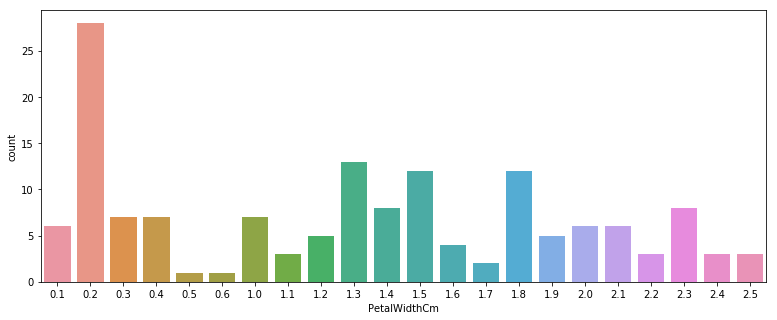

In [11]:
sns.countplot(x="PetalWidthCm", data=data)
fig = plt.gcf()
fig.set_size_inches(13,5)

### 3.10 checking the features of data using pairplot

C:\Users\pkpre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


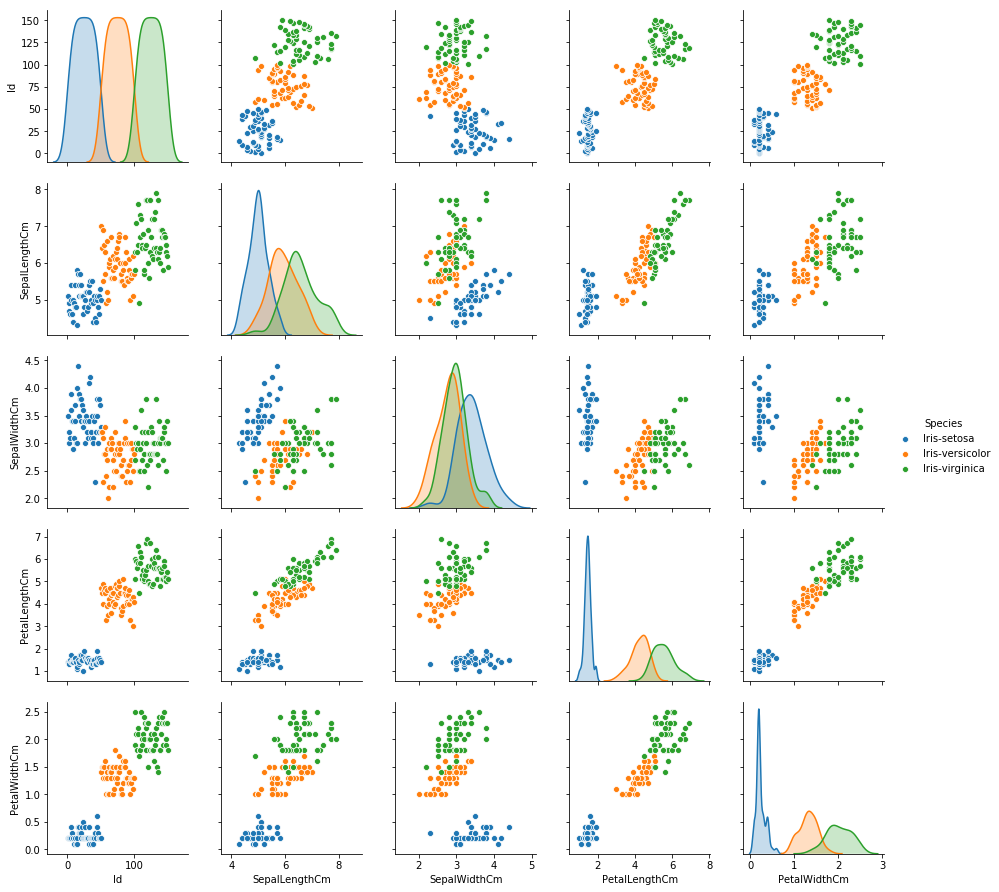

In [12]:
sns.pairplot(data=data, hue = 'Species')

### 3.11 Plotting graphs on basis of "Species" 

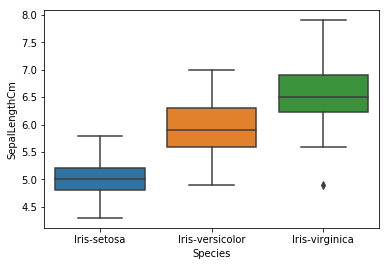

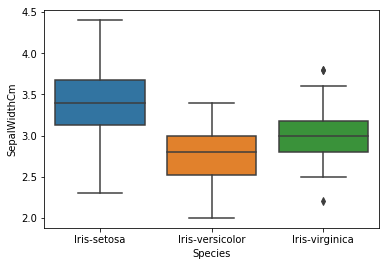

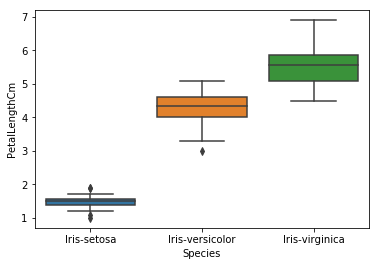

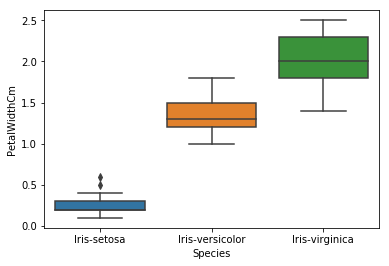

In [13]:
col = data.iloc[:,1:5].columns
for i in col:
    sns.boxplot(x = 'Species',y=i,data=data)
    plt.show()

## 4. data preprocessing

### 4.1 dropping unnecessary columns

In [14]:
data.drop(['Id'],inplace=True,axis=1)

### 4.2 converting string to int of Species column

In [15]:
le = LabelEncoder()

In [16]:
data['Species'] = le.fit_transform(data['Species'])

In [17]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 5. using elbow method finding the value of k

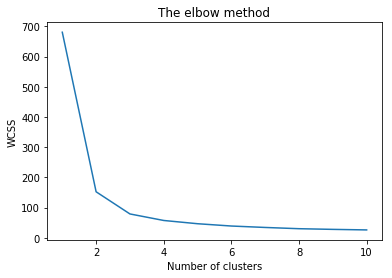

In [18]:
# Finding the optimum number of clusters for k-means classification

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Value of k is 3

## 6. Fitting the dataset into KMeans Clustering algorithm

In [19]:
kmeans = KMeans(n_clusters=3)

In [21]:
kmodel = kmeans.fit(data)

## 7. checking the result

### 7.1 showing all clusters predicted by model

In [22]:
labels = kmodel.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
centroid = kmodel.cluster_centers_
centroid

array([[5.006     , 3.418     , 1.464     , 0.244     , 0.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

### 7.2 showing accuracy in the form of metrics

In [24]:
pd.crosstab(data.iloc[:,-1],labels)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,50,0
2,0,1,49


### 7.3 plotting the values and their cluster predicted by model 

C:\Users\pkpre\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


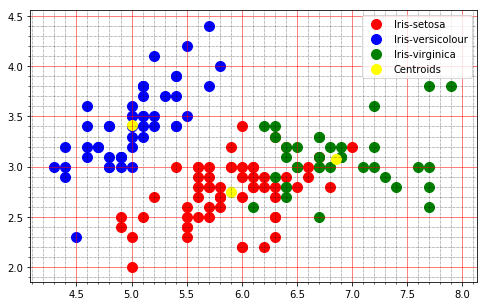

In [44]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
fig = plt.gcf()
fig.set_size_inches(8,5)
p = plt.subplot()
p.grid()
p.grid(linestyle='-', linewidth='0.5', color='red')
p.minorticks_on()
p.grid(which='minor', linestyle=':', linewidth='0.5', color='black')